## Training SVM Model Applying SFS

### Step 1 | Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from plot_confusion_matrix import plot_confusion_matrix

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Train model with selected hyperparameter from tuning function and applying SFS

In [4]:
svm = SVC(C = 5, kernel = 'linear')

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('sfs', SequentialFeatureSelector(svm, n_features_to_select='auto', tol=None, direction='forward', scoring="accuracy", cv=cv, n_jobs=-1)),
    ('svm', svm)
])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sfs',
                 SequentialFeatureSelector(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                                           estimator=SVC(C=5, kernel='linear'),
                                           n_jobs=-1, scoring='accuracy')),
                ('svm', SVC(C=5, kernel='linear'))])

In [7]:
selected_features = X_train.columns[pipe.named_steps['sfs'].get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CH2O', 'SCC', 'MTRANS_Automobile']


In [8]:
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

In [9]:
scaler = StandardScaler()

In [10]:
scaler.fit(X_train_sfs)

StandardScaler()

In [11]:
svm_pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', svm)
])

In [12]:
y_pred = svm_pipeline.predict(X_train_sfs)
accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8716    0.9386    0.9038      2018
           1     0.8519    0.7955    0.8227      2465
           2     0.7116    0.7116    0.7116      1942
           3     0.7298    0.7200    0.7249      2018
           4     0.8430    0.8325    0.8377      2328
           5     0.9395    0.9619    0.9506      2598
           6     0.9969    0.9975    0.9972      3237

    accuracy                         0.8645     16606
   macro avg     0.8492    0.8511    0.8498     16606
weighted avg     0.8638    0.8645    0.8638     16606



In [13]:
y_pred = svm_pipeline.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8803    0.9465    0.9122       505
           1     0.8609    0.7925    0.8253       617
           2     0.7267    0.7072    0.7168       485
           3     0.7243    0.7143    0.7193       504
           4     0.8208    0.8419    0.8312       582
           5     0.9369    0.9600    0.9483       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8646      4152
   macro avg     0.8495    0.8513    0.8499      4152
weighted avg     0.8637    0.8646    0.8637      4152



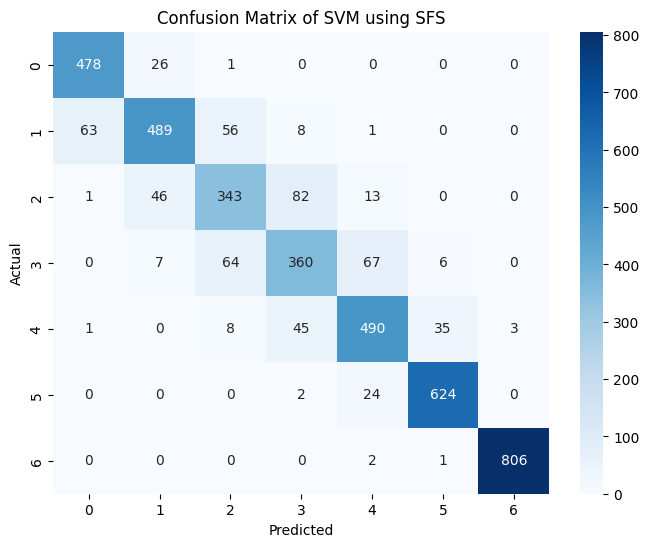

In [14]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of SVM using SFS')